In [ ]:
! git clone https://github.com/Afeefaa/AWS

Cloning into 'AWS'...
remote: Enumerating objects: 2764, done.
remote: Counting objects: 100% (209/209), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 2764 (delta 107), reused 158 (delta 80), pack-reused 2555
Receiving objects: 100% (2764/2764), 493.33 MiB | 24.12 MiB/s, done.
Resolving deltas: 100% (110/110), done.


In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,SpatialDropout2D,AveragePooling2D,BatchNormalization
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread,show,imshow
import cv2
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
os.chdir('AWS')

In [ ]:
batchsize=35
train_datagen = ImageDataGenerator (shear_range=0.1,height_shift_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True,width_shift_range=0.2)

train_generator=train_datagen.flow_from_directory('train',target_size=(256,256),batch_size=35,class_mode='categorical')

Found 1995 images belonging to 6 classes.


In [ ]:
os.chdir('predb')
y_val=np.array([]).reshape((0,6))
x_val=np.array([]).reshape((0,256,256,3))

In [ ]:
def encode_class(x):
  l=[0 for i in range (6)]
  l[x]=1
  return np.array(l).reshape((1,6))

In [ ]:
def load_data(name):
  global x_val
  global y_val
  x=5
  global image
  image=plt.imread(name)
  image=cv2.resize(image,(256,256))

  x_val=np.append(x_val,image.reshape((1,256,256,3)),axis=0)

  if 'cardboard' in name:
    x=0
  elif 'glass' in name:
    x=1
  elif 'metal' in name:
    x=2
  elif 'paper' in name:
    x=3
  elif 'plastic' in name:
    x=4

  y_val=np.append(y_val,encode_class(x),axis=0)

In [ ]:
for i in os.listdir()[1:]:
  load_data(i)
os.chdir("..")

In [ ]:
layers= [Conv2D(32,kernel_size=(3,3),input_shape=(256,256,3),activation='relu'),
         MaxPooling2D(pool_size=(2,2)),
         Dropout(0.5),
         Flatten(),
         Dense(100,activation='relu'),
         Dropout(0.5),
         Dense(6,activation='softmax')]
model=keras.Sequential(layers)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.000005*batchsize),metrics=['accuracy'])

In [ ]:
checkpoint= keras.callbacks.ModelCheckpoint('ckpt.keras',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

try:
  model.load_weights('ckpt.keras')
except:
  print("No pre-existing checkpoint, creating new one")

No pre-existing checkpoint, creating new one


In [ ]:
model.fit(train_generator, steps_per_epoch=1995//batchsize, epochs=30, validation_data=(x_val,y_val), callbacks=[checkpoint,stop])


Epoch 1/30
57/57 [==============================] - ETA: 0s - loss: 263.4238 - accuracy: 0.2226
Epoch 1: val_accuracy improved from -inf to 0.24631, saving model to ckpt.keras
57/57 [==============================] - 44s 663ms/step - loss: 263.4238 - accuracy: 0.2226 - val_loss: 1.7904 - val_accuracy: 0.2463
Epoch 2/30
57/57 [==============================] - ETA: 0s - loss: 1.7894 - accuracy: 0.2426
Epoch 2: val_accuracy did not improve from 0.24631
57/57 [==============================] - 33s 571ms/step - loss: 1.7894 - accuracy: 0.2426 - val_loss: 1.7884 - val_accuracy: 0.2463
Epoch 3/30
57/57 [==============================] - ETA: 0s - loss: 1.7874 - accuracy: 0.2426
Epoch 3: val_accuracy did not improve from 0.24631
57/57 [==============================] - 34s 594ms/step - loss: 1.7874 - accuracy: 0.2426 - val_loss: 1.7864 - val_accuracy: 0.2463
Epoch 4/30
57/57 [==============================] - ETA: 0s - loss: 1.7854 - accuracy: 0.2426
Epoch 4: val_accuracy did not improve from


Enter Test Image Index(Enter an integer lesser than 407): 67


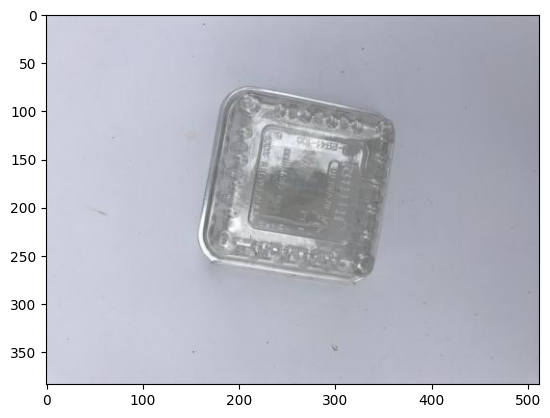

[[0.16353272 0.18336919 0.16215836 0.19439924 0.1722723  0.12426822]]

Correct Class :  plastic399.jpg

Predicted Class : Mixed 
Confidence was too low hence it's precautiously categorized under Mixed


Continue?(1/0) :1

-------------------------------------------------------------------------------------------------------------------------------

Enter Test Image Index(Enter an integer lesser than 407): 54


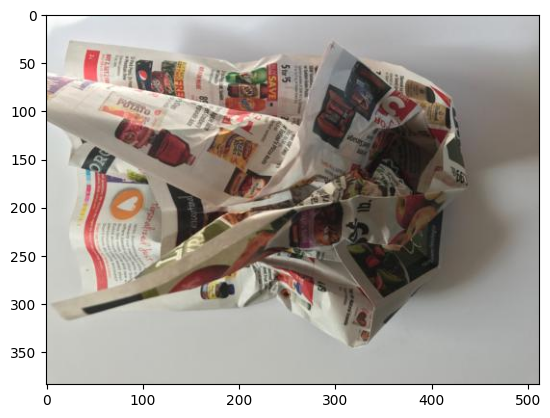

[[0.16353272 0.18336919 0.16215836 0.19439924 0.1722723  0.12426822]]

Correct Class :  paper547.jpg

Predicted Class : Mixed 
Confidence was too low hence it's precautiously categorized under Mixed


In [ ]:
l=["Cardboard","Glass","Metal","Paper","Plastic","Mixed"]
flag=1
try:
  os.chdir('predb')
except:
  os.chdir('.')
dirlist=os.listdir()
while flag==1:
  imgdir=dirlist[int(input("\nEnter Test Image Index(Enter an integer lesser than "+str(len(dirlist))+"): "))]
  img=imread(imgdir)
  imshow(img)
  show()

  img=cv2.resize(img,(256,256))
  img=img.reshape((1,256,256,3))
  pred=model.predict(img,verbose=0)
  print(pred)
  pred_reshaped=pred.reshape((6,))

  print("\nCorrect Class : ",imgdir)

  if np.amax(pred_reshaped)<(2.0/3):
    print("\nPredicted Class : Mixed ")
    print("Confidence was too low hence it's precautiously categorized under Mixed")
  else:
    print("\nPredicted Class : ",l[int(np.where(pred_reshaped==np.amax(pred.reshaped))[0][0])])
    print("Confidence:",np.amax(pred_reshaped)*100//1,"%")

  flag=int(input("\n\nContinue?(1/0) :"))

  print("\n-------------------------------------------------------------------------------------------------------------------------------")
